In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from jax import random
import kepler

from one_datum.noise_model import setup_model

In [2]:
def generate_dataset(
    N=1000,
    true_sigma=0.5,
    true_sigma_err=0.01,
    max_nb_transits=15,
    binary_fraction=0.3,
):
    rv_nb_transits = np.random.randint(3, max_nb_transits, N)
    times = np.random.uniform(0, 668, (max_nb_transits, N))
    sigma = np.exp(np.log(true_sigma) + true_sigma_err * np.random.randn(N))

    semi_amp = np.exp(np.random.uniform(np.log(0.1), np.log(100.0), N))
    semi_amp[np.random.rand(N) > binary_fraction] = 0.0

    log_period = np.random.uniform(np.log(1.0), np.log(1000.0), N)
    phase = np.random.uniform(-np.pi, np.pi, N)
    ecc = np.random.uniform(0, 0.8, N)
    omega = np.random.uniform(-np.pi, np.pi, N)

    mean_anom = (
        2 * np.pi * times * np.exp(-log_period)[None, :] + phase[None, :]
    )
    cosw = np.cos(omega)
    sinw = np.sin(omega)
    _, cosf, sinf = kepler.kepler(
        mean_anom, ecc[None, :] + np.zeros_like(mean_anom)
    )
    model = semi_amp * (
        cosw[None, :] * (ecc[None, :] + cosf) - sinw[None, :] * sinf
    )
    model += sigma * np.random.randn(*model.shape)

    sample_variance = np.zeros(N)
    for i, n in enumerate(rv_nb_transits):
        sample_variance[i] = np.var(model[:n, i], ddof=1)

    return rv_nb_transits, sample_variance

In [3]:
true_sigma = 1.0
binary_fraction = np.linspace(0, 0.5, 10)
datasets = []
for bf in binary_fraction:
    np.random.seed(251986)
    data = generate_dataset(true_sigma=true_sigma, binary_fraction=bf)
    datasets.append(data)

In [4]:
svi = setup_model()
params = []
for n, data in enumerate(datasets):
    svi_result = svi.run(random.PRNGKey(1233 + n), 5000, *data)
    params.append(svi_result.params)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:54:21,  2.09s/it]

  3%|▎         | 155/5000 [00:02<00:49, 98.80it/s]

  5%|▌         | 250/5000 [00:02<00:28, 166.22it/s, init loss: 16943.6162, avg. loss [1-250]: 4958.9309]

  8%|▊         | 382/5000 [00:02<00:16, 286.82it/s, init loss: 16943.6162, avg. loss [1-250]: 4958.9309]

 10%|█         | 500/5000 [00:02<00:11, 389.04it/s, init loss: 16943.6162, avg. loss [251-500]: 4089.0584]

 12%|█▏        | 615/5000 [00:02<00:08, 504.64it/s, init loss: 16943.6162, avg. loss [251-500]: 4089.0584]

 15%|█▌        | 750/5000 [00:02<00:06, 614.64it/s, init loss: 16943.6162, avg. loss [501-750]: 3884.4866]

 17%|█▋        | 866/5000 [00:02<00:05, 719.46it/s, init loss: 16943.6162, avg. loss [501-750]: 3884.4866]

 20%|██        | 1000/5000 [00:03<00:04, 808.21it/s, init loss: 16943.6162, avg. loss [751-1000]: 3781.6696]

 23%|██▎       | 1155/5000 [00:03<00:03, 974.50it/s, init loss: 16943.6162, avg. loss [751-1000]: 3781.6696]

 26%|██▌       | 1277/5000 [00:03<00:03, 943.21it/s, init loss: 16943.6162, avg. loss [1001-1250]: 3721.8821]

 28%|██▊       | 1399/5000 [00:03<00:03, 1007.80it/s, init loss: 16943.6162, avg. loss [1001-1250]: 3721.8821]

 30%|███       | 1513/5000 [00:03<00:03, 1017.30it/s, init loss: 16943.6162, avg. loss [1251-1500]: 3683.1493]

 33%|███▎      | 1652/5000 [00:03<00:03, 1112.57it/s, init loss: 16943.6162, avg. loss [1251-1500]: 3683.1493]

 35%|███▌      | 1772/5000 [00:03<00:03, 1035.54it/s, init loss: 16943.6162, avg. loss [1501-1750]: 3656.5752]

 38%|███▊      | 1923/5000 [00:03<00:02, 1159.68it/s, init loss: 16943.6162, avg. loss [1501-1750]: 3656.5752]

 41%|████      | 2046/5000 [00:03<00:02, 1098.72it/s, init loss: 16943.6162, avg. loss [1751-2000]: 3650.8948]

 44%|████▍     | 2191/5000 [00:04<00:02, 1192.03it/s, init loss: 16943.6162, avg. loss [1751-2000]: 3650.8948]

 46%|████▋     | 2315/5000 [00:04<00:02, 1088.75it/s, init loss: 16943.6162, avg. loss [2001-2250]: 3632.6278]

 49%|████▉     | 2459/5000 [00:04<00:02, 1180.77it/s, init loss: 16943.6162, avg. loss [2001-2250]: 3632.6278]

 52%|█████▏    | 2582/5000 [00:04<00:02, 1065.10it/s, init loss: 16943.6162, avg. loss [2251-2500]: 3622.3558]

 54%|█████▍    | 2718/5000 [00:04<00:02, 1139.59it/s, init loss: 16943.6162, avg. loss [2251-2500]: 3622.3558]

 57%|█████▋    | 2837/5000 [00:04<00:02, 1056.18it/s, init loss: 16943.6162, avg. loss [2501-2750]: 3628.8893]

 59%|█████▉    | 2947/5000 [00:04<00:01, 1039.19it/s, init loss: 16943.6162, avg. loss [2501-2750]: 3628.8893]

 61%|██████    | 3054/5000 [00:04<00:01, 996.76it/s, init loss: 16943.6162, avg. loss [2751-3000]: 3618.2251] 

 64%|██████▍   | 3189/5000 [00:04<00:01, 1089.41it/s, init loss: 16943.6162, avg. loss [2751-3000]: 3618.2251]

 66%|██████▌   | 3301/5000 [00:05<00:01, 1027.99it/s, init loss: 16943.6162, avg. loss [3001-3250]: 3612.6191]

 68%|██████▊   | 3410/5000 [00:05<00:01, 1044.62it/s, init loss: 16943.6162, avg. loss [3001-3250]: 3612.6191]

 70%|███████   | 3517/5000 [00:05<00:01, 1027.67it/s, init loss: 16943.6162, avg. loss [3251-3500]: 3614.5892]

 73%|███████▎  | 3635/5000 [00:05<00:01, 1067.81it/s, init loss: 16943.6162, avg. loss [3251-3500]: 3614.5892]

 75%|███████▌  | 3750/5000 [00:05<00:01, 1015.63it/s, init loss: 16943.6162, avg. loss [3501-3750]: 3611.6964]

 77%|███████▋  | 3867/5000 [00:05<00:01, 1055.51it/s, init loss: 16943.6162, avg. loss [3501-3750]: 3611.6964]

 80%|███████▉  | 3998/5000 [00:05<00:00, 1125.41it/s, init loss: 16943.6162, avg. loss [3501-3750]: 3611.6964]

 82%|████████▏ | 4112/5000 [00:05<00:00, 1018.42it/s, init loss: 16943.6162, avg. loss [3751-4000]: 3606.1820]

 85%|████████▍ | 4228/5000 [00:05<00:00, 1055.15it/s, init loss: 16943.6162, avg. loss [3751-4000]: 3606.1820]

 87%|████████▋ | 4336/5000 [00:06<00:00, 1004.02it/s, init loss: 16943.6162, avg. loss [4001-4250]: 3606.6095]

 89%|████████▉ | 4472/5000 [00:06<00:00, 1100.98it/s, init loss: 16943.6162, avg. loss [4001-4250]: 3606.6095]

 92%|█████████▏| 4585/5000 [00:06<00:00, 1014.94it/s, init loss: 16943.6162, avg. loss [4251-4500]: 3610.0033]

 94%|█████████▍| 4704/5000 [00:06<00:00, 1061.39it/s, init loss: 16943.6162, avg. loss [4251-4500]: 3610.0033]

 96%|█████████▋| 4813/5000 [00:06<00:00, 1017.92it/s, init loss: 16943.6162, avg. loss [4501-4750]: 3604.2484]

 99%|█████████▊| 4932/5000 [00:06<00:00, 1064.32it/s, init loss: 16943.6162, avg. loss [4501-4750]: 3604.2484]

100%|██████████| 5000/5000 [00:06<00:00, 743.29it/s, init loss: 16943.6162, avg. loss [4751-5000]: 3606.2620] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:47:23,  2.01s/it]

  2%|▏         | 116/5000 [00:02<01:03, 76.79it/s]

  5%|▌         | 250/5000 [00:02<00:26, 180.47it/s, init loss: 10772.1812, avg. loss [1-250]: 5028.0004]

  7%|▋         | 367/5000 [00:02<00:16, 286.42it/s, init loss: 10772.1812, avg. loss [1-250]: 5028.0004]

 10%|▉         | 483/5000 [00:02<00:11, 402.23it/s, init loss: 10772.1812, avg. loss [1-250]: 5028.0004]

 12%|█▏        | 586/5000 [00:02<00:08, 497.38it/s, init loss: 10772.1812, avg. loss [251-500]: 4237.6885]

 14%|█▍        | 718/5000 [00:02<00:06, 648.36it/s, init loss: 10772.1812, avg. loss [251-500]: 4237.6885]

 17%|█▋        | 830/5000 [00:02<00:05, 746.20it/s, init loss: 10772.1812, avg. loss [501-750]: 4047.1926]

 19%|█▉        | 942/5000 [00:02<00:04, 814.30it/s, init loss: 10772.1812, avg. loss [501-750]: 4047.1926]

 21%|██        | 1051/5000 [00:02<00:04, 878.71it/s, init loss: 10772.1812, avg. loss [751-1000]: 3955.4131]

 23%|██▎       | 1171/5000 [00:03<00:03, 960.56it/s, init loss: 10772.1812, avg. loss [751-1000]: 3955.4131]

 26%|██▌       | 1283/5000 [00:03<00:03, 984.03it/s, init loss: 10772.1812, avg. loss [1001-1250]: 3901.7843]

 28%|██▊       | 1425/5000 [00:03<00:03, 1098.92it/s, init loss: 10772.1812, avg. loss [1001-1250]: 3901.7843]

 31%|███       | 1544/5000 [00:03<00:03, 1051.12it/s, init loss: 10772.1812, avg. loss [1251-1500]: 3871.9450]

 34%|███▎      | 1687/5000 [00:03<00:02, 1152.81it/s, init loss: 10772.1812, avg. loss [1251-1500]: 3871.9450]

 36%|███▌      | 1808/5000 [00:03<00:02, 1123.51it/s, init loss: 10772.1812, avg. loss [1501-1750]: 3847.9253]

 38%|███▊      | 1925/5000 [00:03<00:02, 1107.57it/s, init loss: 10772.1812, avg. loss [1501-1750]: 3847.9253]

 41%|████      | 2039/5000 [00:03<00:02, 1038.81it/s, init loss: 10772.1812, avg. loss [1751-2000]: 3837.2271]

 43%|████▎     | 2154/5000 [00:03<00:02, 1067.31it/s, init loss: 10772.1812, avg. loss [1751-2000]: 3837.2271]

 45%|████▌     | 2263/5000 [00:04<00:02, 1024.20it/s, init loss: 10772.1812, avg. loss [2001-2250]: 3829.3435]

 48%|████▊     | 2377/5000 [00:04<00:02, 1055.62it/s, init loss: 10772.1812, avg. loss [2001-2250]: 3829.3435]

 50%|████▉     | 2493/5000 [00:04<00:02, 1084.62it/s, init loss: 10772.1812, avg. loss [2001-2250]: 3829.3435]

 52%|█████▏    | 2603/5000 [00:04<00:02, 1050.46it/s, init loss: 10772.1812, avg. loss [2251-2500]: 3830.0988]

 55%|█████▍    | 2740/5000 [00:04<00:01, 1140.53it/s, init loss: 10772.1812, avg. loss [2251-2500]: 3830.0988]

 57%|█████▋    | 2856/5000 [00:04<00:02, 1035.63it/s, init loss: 10772.1812, avg. loss [2501-2750]: 3817.6371]

 60%|██████    | 3000/5000 [00:04<00:01, 1032.62it/s, init loss: 10772.1812, avg. loss [2751-3000]: 3814.9879]

 63%|██████▎   | 3141/5000 [00:04<00:01, 1129.10it/s, init loss: 10772.1812, avg. loss [2751-3000]: 3814.9879]

 65%|██████▌   | 3257/5000 [00:04<00:01, 1041.17it/s, init loss: 10772.1812, avg. loss [3001-3250]: 3809.4469]

 67%|██████▋   | 3373/5000 [00:05<00:01, 1071.31it/s, init loss: 10772.1812, avg. loss [3001-3250]: 3809.4469]

 70%|██████▉   | 3490/5000 [00:05<00:01, 1095.63it/s, init loss: 10772.1812, avg. loss [3001-3250]: 3809.4469]

 72%|███████▏  | 3602/5000 [00:05<00:01, 1032.39it/s, init loss: 10772.1812, avg. loss [3251-3500]: 3807.6155]

 74%|███████▍  | 3718/5000 [00:05<00:01, 1065.65it/s, init loss: 10772.1812, avg. loss [3251-3500]: 3807.6155]

 77%|███████▋  | 3827/5000 [00:05<00:01, 1011.67it/s, init loss: 10772.1812, avg. loss [3501-3750]: 3804.9196]

 79%|███████▉  | 3957/5000 [00:05<00:00, 1090.50it/s, init loss: 10772.1812, avg. loss [3501-3750]: 3804.9196]

 81%|████████▏ | 4069/5000 [00:05<00:00, 1098.35it/s, init loss: 10772.1812, avg. loss [3751-4000]: 3808.8378]

 84%|████████▍ | 4195/5000 [00:05<00:00, 1142.69it/s, init loss: 10772.1812, avg. loss [3751-4000]: 3808.8378]

 86%|████████▌ | 4311/5000 [00:05<00:00, 1145.88it/s, init loss: 10772.1812, avg. loss [4001-4250]: 3805.2023]

 89%|████████▉ | 4450/5000 [00:06<00:00, 1215.19it/s, init loss: 10772.1812, avg. loss [4001-4250]: 3805.2023]

 91%|█████████▏| 4573/5000 [00:06<00:00, 1046.75it/s, init loss: 10772.1812, avg. loss [4251-4500]: 3813.4064]

 94%|█████████▍| 4717/5000 [00:06<00:00, 1150.18it/s, init loss: 10772.1812, avg. loss [4251-4500]: 3813.4064]

 97%|█████████▋| 4845/5000 [00:06<00:00, 1185.56it/s, init loss: 10772.1812, avg. loss [4501-4750]: 3806.1563]

 99%|█████████▉| 4969/5000 [00:06<00:00, 1199.92it/s, init loss: 10772.1812, avg. loss [4501-4750]: 3806.1563]

100%|██████████| 5000/5000 [00:06<00:00, 763.12it/s, init loss: 10772.1812, avg. loss [4751-5000]: 3804.9657] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:47:34,  2.01s/it]

  3%|▎         | 127/5000 [00:02<00:58, 83.97it/s]

  5%|▌         | 250/5000 [00:02<00:26, 178.93it/s, init loss: 12273.3802, avg. loss [1-250]: 5183.5925]

  8%|▊         | 381/5000 [00:02<00:15, 300.65it/s, init loss: 12273.3802, avg. loss [1-250]: 5183.5925]

 10%|█         | 500/5000 [00:02<00:11, 403.97it/s, init loss: 12273.3802, avg. loss [251-500]: 4403.8048]

 12%|█▎        | 625/5000 [00:02<00:08, 534.80it/s, init loss: 12273.3802, avg. loss [251-500]: 4403.8048]

 15%|█▌        | 750/5000 [00:02<00:06, 648.53it/s, init loss: 12273.3802, avg. loss [501-750]: 4208.2528]

 18%|█▊        | 879/5000 [00:02<00:05, 777.05it/s, init loss: 12273.3802, avg. loss [501-750]: 4208.2528]

 20%|██        | 1000/5000 [00:02<00:04, 838.72it/s, init loss: 12273.3802, avg. loss [751-1000]: 4115.6423]

 23%|██▎       | 1145/5000 [00:03<00:03, 980.36it/s, init loss: 12273.3802, avg. loss [751-1000]: 4115.6423]

 25%|██▌       | 1266/5000 [00:03<00:03, 958.41it/s, init loss: 12273.3802, avg. loss [1001-1250]: 4059.1619]

 28%|██▊       | 1380/5000 [00:03<00:03, 1003.00it/s, init loss: 12273.3802, avg. loss [1001-1250]: 4059.1619]

 30%|███       | 1500/5000 [00:03<00:03, 1035.99it/s, init loss: 12273.3802, avg. loss [1251-1500]: 4024.9221]

 32%|███▏      | 1615/5000 [00:03<00:03, 1065.60it/s, init loss: 12273.3802, avg. loss [1251-1500]: 4024.9221]

 35%|███▍      | 1734/5000 [00:03<00:02, 1098.58it/s, init loss: 12273.3802, avg. loss [1251-1500]: 4024.9221]

 37%|███▋      | 1849/5000 [00:03<00:03, 1049.99it/s, init loss: 12273.3802, avg. loss [1501-1750]: 4003.7251]

 39%|███▉      | 1970/5000 [00:03<00:02, 1093.00it/s, init loss: 12273.3802, avg. loss [1501-1750]: 4003.7251]

 42%|████▏     | 2091/5000 [00:03<00:02, 1124.62it/s, init loss: 12273.3802, avg. loss [1751-2000]: 3985.7634]

 45%|████▍     | 2227/5000 [00:03<00:02, 1191.65it/s, init loss: 12273.3802, avg. loss [1751-2000]: 3985.7634]

 47%|████▋     | 2349/5000 [00:04<00:02, 1104.82it/s, init loss: 12273.3802, avg. loss [2001-2250]: 3973.6158]

 49%|████▉     | 2469/5000 [00:04<00:02, 1130.05it/s, init loss: 12273.3802, avg. loss [2001-2250]: 3973.6158]

 52%|█████▏    | 2584/5000 [00:04<00:02, 1106.60it/s, init loss: 12273.3802, avg. loss [2251-2500]: 3976.3256]

 54%|█████▍    | 2721/5000 [00:04<00:01, 1180.80it/s, init loss: 12273.3802, avg. loss [2251-2500]: 3976.3256]

 57%|█████▋    | 2841/5000 [00:04<00:01, 1120.20it/s, init loss: 12273.3802, avg. loss [2501-2750]: 3965.0827]

 59%|█████▉    | 2973/5000 [00:04<00:01, 1175.23it/s, init loss: 12273.3802, avg. loss [2501-2750]: 3965.0827]

 62%|██████▏   | 3094/5000 [00:04<00:01, 1183.01it/s, init loss: 12273.3802, avg. loss [2751-3000]: 3969.5939]

 64%|██████▍   | 3218/5000 [00:04<00:01, 1042.63it/s, init loss: 12273.3802, avg. loss [2751-3000]: 3969.5939]

 67%|██████▋   | 3327/5000 [00:05<00:01, 994.75it/s, init loss: 12273.3802, avg. loss [3001-3250]: 3964.1642] 

 69%|██████▉   | 3443/5000 [00:05<00:01, 1036.00it/s, init loss: 12273.3802, avg. loss [3001-3250]: 3964.1642]

 71%|███████   | 3550/5000 [00:05<00:01, 991.33it/s, init loss: 12273.3802, avg. loss [3251-3500]: 3962.7927] 

 74%|███████▍  | 3689/5000 [00:05<00:01, 1097.18it/s, init loss: 12273.3802, avg. loss [3251-3500]: 3962.7927]

 76%|███████▌  | 3802/5000 [00:05<00:01, 1037.02it/s, init loss: 12273.3802, avg. loss [3501-3750]: 3956.2245]

 79%|███████▉  | 3948/5000 [00:05<00:00, 1151.20it/s, init loss: 12273.3802, avg. loss [3501-3750]: 3956.2245]

 81%|████████▏ | 4066/5000 [00:05<00:00, 1026.79it/s, init loss: 12273.3802, avg. loss [3751-4000]: 3956.5054]

 85%|████████▍ | 4228/5000 [00:05<00:00, 1181.18it/s, init loss: 12273.3802, avg. loss [3751-4000]: 3956.5054]

 87%|████████▋ | 4352/5000 [00:05<00:00, 1112.27it/s, init loss: 12273.3802, avg. loss [4001-4250]: 3960.5593]

 89%|████████▉ | 4468/5000 [00:06<00:00, 1062.91it/s, init loss: 12273.3802, avg. loss [4001-4250]: 3960.5593]

 92%|█████████▏| 4578/5000 [00:06<00:00, 1069.15it/s, init loss: 12273.3802, avg. loss [4251-4500]: 3960.1548]

 94%|█████████▍| 4688/5000 [00:06<00:00, 1074.39it/s, init loss: 12273.3802, avg. loss [4251-4500]: 3960.1548]

 96%|█████████▌| 4808/5000 [00:06<00:00, 1109.12it/s, init loss: 12273.3802, avg. loss [4501-4750]: 3954.3797]

 98%|█████████▊| 4924/5000 [00:06<00:00, 1120.62it/s, init loss: 12273.3802, avg. loss [4501-4750]: 3954.3797]

100%|██████████| 5000/5000 [00:06<00:00, 764.54it/s, init loss: 12273.3802, avg. loss [4751-5000]: 3957.0388] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:48:53,  2.03s/it]

  2%|▏         | 124/5000 [00:02<00:59, 81.42it/s]

  5%|▍         | 239/5000 [00:02<00:27, 173.22it/s]

  7%|▋         | 331/5000 [00:02<00:18, 253.16it/s, init loss: 8908.7759, avg. loss [1-250]: 5178.3033]

  9%|▉         | 448/5000 [00:02<00:12, 376.17it/s, init loss: 8908.7759, avg. loss [1-250]: 5178.3033]

 11%|█         | 548/5000 [00:02<00:09, 467.02it/s, init loss: 8908.7759, avg. loss [251-500]: 4474.6369]

 14%|█▍        | 689/5000 [00:02<00:06, 640.13it/s, init loss: 8908.7759, avg. loss [251-500]: 4474.6369]

 16%|█▌        | 800/5000 [00:02<00:06, 678.62it/s, init loss: 8908.7759, avg. loss [501-750]: 4309.7761]

 19%|█▊        | 933/5000 [00:02<00:04, 817.90it/s, init loss: 8908.7759, avg. loss [501-750]: 4309.7761]

 21%|██        | 1044/5000 [00:03<00:04, 863.84it/s, init loss: 8908.7759, avg. loss [751-1000]: 4233.9057]

 23%|██▎       | 1158/5000 [00:03<00:04, 930.62it/s, init loss: 8908.7759, avg. loss [751-1000]: 4233.9057]

 25%|██▌       | 1268/5000 [00:03<00:03, 944.58it/s, init loss: 8908.7759, avg. loss [1001-1250]: 4187.6067]

 28%|██▊       | 1391/5000 [00:03<00:03, 1019.89it/s, init loss: 8908.7759, avg. loss [1001-1250]: 4187.6067]

 30%|███       | 1502/5000 [00:03<00:03, 983.19it/s, init loss: 8908.7759, avg. loss [1251-1500]: 4160.3539] 

 32%|███▏      | 1620/5000 [00:03<00:03, 1034.08it/s, init loss: 8908.7759, avg. loss [1251-1500]: 4160.3539]

 35%|███▍      | 1738/5000 [00:03<00:03, 1072.76it/s, init loss: 8908.7759, avg. loss [1251-1500]: 4160.3539]

 37%|███▋      | 1850/5000 [00:03<00:03, 1029.57it/s, init loss: 8908.7759, avg. loss [1501-1750]: 4140.8550]

 40%|███▉      | 1975/5000 [00:03<00:02, 1088.47it/s, init loss: 8908.7759, avg. loss [1501-1750]: 4140.8550]

 42%|████▏     | 2087/5000 [00:03<00:02, 1068.26it/s, init loss: 8908.7759, avg. loss [1751-2000]: 4127.3600]

 45%|████▍     | 2236/5000 [00:04<00:02, 1185.66it/s, init loss: 8908.7759, avg. loss [1751-2000]: 4127.3600]

 47%|████▋     | 2357/5000 [00:04<00:02, 1085.66it/s, init loss: 8908.7759, avg. loss [2001-2250]: 4119.0088]

 49%|████▉     | 2470/5000 [00:04<00:02, 1096.65it/s, init loss: 8908.7759, avg. loss [2001-2250]: 4119.0088]

 52%|█████▏    | 2584/5000 [00:04<00:02, 1107.92it/s, init loss: 8908.7759, avg. loss [2251-2500]: 4120.1654]

 54%|█████▍    | 2707/5000 [00:04<00:02, 1141.42it/s, init loss: 8908.7759, avg. loss [2251-2500]: 4120.1654]

 56%|█████▋    | 2823/5000 [00:04<00:01, 1090.61it/s, init loss: 8908.7759, avg. loss [2501-2750]: 4115.7821]

 59%|█████▊    | 2934/5000 [00:04<00:01, 1068.86it/s, init loss: 8908.7759, avg. loss [2501-2750]: 4115.7821]

 61%|██████    | 3042/5000 [00:04<00:01, 1039.82it/s, init loss: 8908.7759, avg. loss [2751-3000]: 4111.9708]

 63%|██████▎   | 3174/5000 [00:04<00:01, 1115.05it/s, init loss: 8908.7759, avg. loss [2751-3000]: 4111.9708]

 66%|██████▌   | 3287/5000 [00:05<00:01, 1032.68it/s, init loss: 8908.7759, avg. loss [3001-3250]: 4116.3212]

 68%|██████▊   | 3407/5000 [00:05<00:01, 1078.04it/s, init loss: 8908.7759, avg. loss [3001-3250]: 4116.3212]

 70%|███████   | 3517/5000 [00:05<00:01, 1051.27it/s, init loss: 8908.7759, avg. loss [3251-3500]: 4114.6259]

 73%|███████▎  | 3653/5000 [00:05<00:01, 1136.11it/s, init loss: 8908.7759, avg. loss [3251-3500]: 4114.6259]

 75%|███████▌  | 3768/5000 [00:05<00:01, 1048.10it/s, init loss: 8908.7759, avg. loss [3501-3750]: 4107.2342]

 78%|███████▊  | 3894/5000 [00:05<00:01, 1104.70it/s, init loss: 8908.7759, avg. loss [3501-3750]: 4107.2342]

 80%|████████  | 4007/5000 [00:05<00:00, 1039.83it/s, init loss: 8908.7759, avg. loss [3751-4000]: 4103.5737]

 83%|████████▎ | 4146/5000 [00:05<00:00, 1135.07it/s, init loss: 8908.7759, avg. loss [3751-4000]: 4103.5737]

 85%|████████▌ | 4262/5000 [00:05<00:00, 1005.90it/s, init loss: 8908.7759, avg. loss [4001-4250]: 4106.3051]

 88%|████████▊ | 4407/5000 [00:06<00:00, 1118.67it/s, init loss: 8908.7759, avg. loss [4001-4250]: 4106.3051]

 90%|█████████ | 4524/5000 [00:06<00:00, 1055.67it/s, init loss: 8908.7759, avg. loss [4251-4500]: 4103.0965]

 93%|█████████▎| 4669/5000 [00:06<00:00, 1158.03it/s, init loss: 8908.7759, avg. loss [4251-4500]: 4103.0965]

 96%|█████████▌| 4789/5000 [00:06<00:00, 1087.54it/s, init loss: 8908.7759, avg. loss [4501-4750]: 4106.5145]

 98%|█████████▊| 4909/5000 [00:06<00:00, 1116.73it/s, init loss: 8908.7759, avg. loss [4501-4750]: 4106.5145]

100%|██████████| 5000/5000 [00:06<00:00, 751.93it/s, init loss: 8908.7759, avg. loss [4751-5000]: 4107.2791] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:01<2:45:39,  1.99s/it]

  2%|▏         | 117/5000 [00:02<01:02, 78.22it/s]

  5%|▌         | 250/5000 [00:02<00:26, 182.08it/s, init loss: 10282.7034, avg. loss [1-250]: 5536.8042]

  8%|▊         | 396/5000 [00:02<00:14, 320.00it/s, init loss: 10282.7034, avg. loss [1-250]: 5536.8042]

 10%|█         | 504/5000 [00:02<00:11, 402.13it/s, init loss: 10282.7034, avg. loss [251-500]: 4747.1464]

 13%|█▎        | 654/5000 [00:02<00:07, 571.06it/s, init loss: 10282.7034, avg. loss [251-500]: 4747.1464]

 15%|█▌        | 769/5000 [00:02<00:06, 636.70it/s, init loss: 10282.7034, avg. loss [501-750]: 4576.8634]

 18%|█▊        | 914/5000 [00:02<00:05, 795.38it/s, init loss: 10282.7034, avg. loss [501-750]: 4576.8634]

 21%|██        | 1032/5000 [00:02<00:04, 813.56it/s, init loss: 10282.7034, avg. loss [751-1000]: 4490.4292]

 23%|██▎       | 1161/5000 [00:03<00:04, 918.98it/s, init loss: 10282.7034, avg. loss [751-1000]: 4490.4292]

 26%|██▌       | 1276/5000 [00:03<00:03, 954.28it/s, init loss: 10282.7034, avg. loss [1001-1250]: 4438.0529]

 28%|██▊       | 1412/5000 [00:03<00:03, 1055.67it/s, init loss: 10282.7034, avg. loss [1001-1250]: 4438.0529]

 31%|███       | 1531/5000 [00:03<00:03, 1004.55it/s, init loss: 10282.7034, avg. loss [1251-1500]: 4417.1566]

 33%|███▎      | 1663/5000 [00:03<00:03, 1085.76it/s, init loss: 10282.7034, avg. loss [1251-1500]: 4417.1566]

 36%|███▌      | 1780/5000 [00:03<00:03, 1022.36it/s, init loss: 10282.7034, avg. loss [1501-1750]: 4394.9300]

 38%|███▊      | 1898/5000 [00:03<00:02, 1062.75it/s, init loss: 10282.7034, avg. loss [1501-1750]: 4394.9300]

 40%|████      | 2010/5000 [00:03<00:02, 1044.09it/s, init loss: 10282.7034, avg. loss [1751-2000]: 4383.1513]

 43%|████▎     | 2157/5000 [00:03<00:02, 1160.19it/s, init loss: 10282.7034, avg. loss [1751-2000]: 4383.1513]

 46%|████▌     | 2277/5000 [00:04<00:02, 1067.49it/s, init loss: 10282.7034, avg. loss [2001-2250]: 4379.3693]

 48%|████▊     | 2411/5000 [00:04<00:02, 1135.68it/s, init loss: 10282.7034, avg. loss [2001-2250]: 4379.3693]

 51%|█████     | 2528/5000 [00:04<00:02, 1050.78it/s, init loss: 10282.7034, avg. loss [2251-2500]: 4369.2182]

 53%|█████▎    | 2650/5000 [00:04<00:02, 1093.92it/s, init loss: 10282.7034, avg. loss [2251-2500]: 4369.2182]

 55%|█████▌    | 2763/5000 [00:04<00:02, 1067.69it/s, init loss: 10282.7034, avg. loss [2501-2750]: 4364.3976]

 58%|█████▊    | 2893/5000 [00:04<00:01, 1128.34it/s, init loss: 10282.7034, avg. loss [2501-2750]: 4364.3976]

 60%|██████    | 3008/5000 [00:04<00:01, 1080.81it/s, init loss: 10282.7034, avg. loss [2751-3000]: 4360.2497]

 63%|██████▎   | 3142/5000 [00:04<00:01, 1149.93it/s, init loss: 10282.7034, avg. loss [2751-3000]: 4360.2497]

 65%|██████▌   | 3259/5000 [00:04<00:01, 1122.49it/s, init loss: 10282.7034, avg. loss [3001-3250]: 4356.7599]

 68%|██████▊   | 3375/5000 [00:05<00:01, 1130.60it/s, init loss: 10282.7034, avg. loss [3001-3250]: 4356.7599]

 70%|██████▉   | 3491/5000 [00:05<00:01, 1136.57it/s, init loss: 10282.7034, avg. loss [3001-3250]: 4356.7599]

 72%|███████▏  | 3606/5000 [00:05<00:01, 1056.64it/s, init loss: 10282.7034, avg. loss [3251-3500]: 4355.3197]

 74%|███████▍  | 3720/5000 [00:05<00:01, 1079.21it/s, init loss: 10282.7034, avg. loss [3251-3500]: 4355.3197]

 77%|███████▋  | 3830/5000 [00:05<00:01, 1019.14it/s, init loss: 10282.7034, avg. loss [3501-3750]: 4353.5170]

 79%|███████▉  | 3964/5000 [00:05<00:00, 1107.19it/s, init loss: 10282.7034, avg. loss [3501-3750]: 4353.5170]

 82%|████████▏ | 4077/5000 [00:05<00:00, 1029.02it/s, init loss: 10282.7034, avg. loss [3751-4000]: 4355.1842]

 84%|████████▍ | 4206/5000 [00:05<00:00, 1098.73it/s, init loss: 10282.7034, avg. loss [3751-4000]: 4355.1842]

 86%|████████▋ | 4319/5000 [00:05<00:00, 1036.49it/s, init loss: 10282.7034, avg. loss [4001-4250]: 4355.1770]

 89%|████████▉ | 4462/5000 [00:06<00:00, 1139.82it/s, init loss: 10282.7034, avg. loss [4001-4250]: 4355.1770]

 92%|█████████▏| 4579/5000 [00:06<00:00, 1143.68it/s, init loss: 10282.7034, avg. loss [4251-4500]: 4352.0813]

 94%|█████████▍| 4696/5000 [00:06<00:00, 1092.18it/s, init loss: 10282.7034, avg. loss [4251-4500]: 4352.0813]

 96%|█████████▌| 4807/5000 [00:06<00:00, 1036.31it/s, init loss: 10282.7034, avg. loss [4501-4750]: 4352.1326]

 99%|█████████▊| 4931/5000 [00:06<00:00, 1090.83it/s, init loss: 10282.7034, avg. loss [4501-4750]: 4352.1326]

100%|██████████| 5000/5000 [00:06<00:00, 761.70it/s, init loss: 10282.7034, avg. loss [4751-5000]: 4359.0468] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:48:01,  2.02s/it]

  3%|▎         | 127/5000 [00:02<00:58, 83.77it/s]

  5%|▍         | 243/5000 [00:02<00:26, 176.52it/s]

  7%|▋         | 336/5000 [00:02<00:18, 256.29it/s, init loss: 12362.6116, avg. loss [1-250]: 5739.7380]

  9%|▉         | 450/5000 [00:02<00:12, 374.82it/s, init loss: 12362.6116, avg. loss [1-250]: 5739.7380]

 11%|█         | 554/5000 [00:02<00:09, 481.54it/s, init loss: 12362.6116, avg. loss [251-500]: 4967.4107]

 13%|█▎        | 662/5000 [00:02<00:07, 593.16it/s, init loss: 12362.6116, avg. loss [251-500]: 4967.4107]

 15%|█▌        | 765/5000 [00:02<00:06, 671.59it/s, init loss: 12362.6116, avg. loss [501-750]: 4788.1079]

 18%|█▊        | 895/5000 [00:02<00:05, 814.11it/s, init loss: 12362.6116, avg. loss [501-750]: 4788.1079]

 20%|██        | 1005/5000 [00:02<00:04, 820.94it/s, init loss: 12362.6116, avg. loss [751-1000]: 4694.8455]

 23%|██▎       | 1146/5000 [00:03<00:03, 964.83it/s, init loss: 12362.6116, avg. loss [751-1000]: 4694.8455]

 25%|██▌       | 1260/5000 [00:03<00:03, 965.15it/s, init loss: 12362.6116, avg. loss [1001-1250]: 4646.2146]

 28%|██▊       | 1404/5000 [00:03<00:03, 1088.21it/s, init loss: 12362.6116, avg. loss [1001-1250]: 4646.2146]

 30%|███       | 1523/5000 [00:03<00:03, 1026.81it/s, init loss: 12362.6116, avg. loss [1251-1500]: 4614.6209]

 33%|███▎      | 1638/5000 [00:03<00:03, 1057.83it/s, init loss: 12362.6116, avg. loss [1251-1500]: 4614.6209]

 35%|███▌      | 1750/5000 [00:03<00:03, 1001.36it/s, init loss: 12362.6116, avg. loss [1501-1750]: 4592.5519]

 37%|███▋      | 1871/5000 [00:03<00:02, 1055.10it/s, init loss: 12362.6116, avg. loss [1501-1750]: 4592.5519]

 40%|████      | 2000/5000 [00:03<00:02, 1043.63it/s, init loss: 12362.6116, avg. loss [1751-2000]: 4581.8927]

 43%|████▎     | 2143/5000 [00:03<00:02, 1146.83it/s, init loss: 12362.6116, avg. loss [1751-2000]: 4581.8927]

 45%|████▌     | 2261/5000 [00:04<00:02, 1001.82it/s, init loss: 12362.6116, avg. loss [2001-2250]: 4574.9717]

 47%|████▋     | 2374/5000 [00:04<00:02, 1034.38it/s, init loss: 12362.6116, avg. loss [2001-2250]: 4574.9717]

 50%|████▉     | 2489/5000 [00:04<00:02, 1062.84it/s, init loss: 12362.6116, avg. loss [2001-2250]: 4574.9717]

 52%|█████▏    | 2599/5000 [00:04<00:02, 1054.27it/s, init loss: 12362.6116, avg. loss [2251-2500]: 4572.2866]

 54%|█████▍    | 2713/5000 [00:04<00:02, 1076.31it/s, init loss: 12362.6116, avg. loss [2251-2500]: 4572.2866]

 56%|█████▋    | 2823/5000 [00:04<00:02, 1078.54it/s, init loss: 12362.6116, avg. loss [2501-2750]: 4561.0053]

 59%|█████▊    | 2933/5000 [00:04<00:01, 1075.24it/s, init loss: 12362.6116, avg. loss [2501-2750]: 4561.0053]

 61%|██████    | 3042/5000 [00:04<00:01, 1040.03it/s, init loss: 12362.6116, avg. loss [2751-3000]: 4559.4968]

 63%|██████▎   | 3168/5000 [00:04<00:01, 1102.44it/s, init loss: 12362.6116, avg. loss [2751-3000]: 4559.4968]

 66%|██████▌   | 3280/5000 [00:05<00:01, 987.00it/s, init loss: 12362.6116, avg. loss [3001-3250]: 4563.4078] 

 69%|██████▊   | 3432/5000 [00:05<00:01, 1128.73it/s, init loss: 12362.6116, avg. loss [3001-3250]: 4563.4078]

 71%|███████   | 3549/5000 [00:05<00:01, 1074.84it/s, init loss: 12362.6116, avg. loss [3251-3500]: 4558.3000]

 74%|███████▎  | 3681/5000 [00:05<00:01, 1140.82it/s, init loss: 12362.6116, avg. loss [3251-3500]: 4558.3000]

 76%|███████▌  | 3798/5000 [00:05<00:01, 993.73it/s, init loss: 12362.6116, avg. loss [3501-3750]: 4553.9206] 

 78%|███████▊  | 3911/5000 [00:05<00:01, 1028.05it/s, init loss: 12362.6116, avg. loss [3501-3750]: 4553.9206]

 80%|████████  | 4018/5000 [00:05<00:01, 942.31it/s, init loss: 12362.6116, avg. loss [3751-4000]: 4558.3705] 

 83%|████████▎ | 4131/5000 [00:05<00:00, 988.58it/s, init loss: 12362.6116, avg. loss [3751-4000]: 4558.3705]

 85%|████████▌ | 4250/5000 [00:06<00:00, 992.99it/s, init loss: 12362.6116, avg. loss [4001-4250]: 4557.9170]

 88%|████████▊ | 4388/5000 [00:06<00:00, 1094.71it/s, init loss: 12362.6116, avg. loss [4001-4250]: 4557.9170]

 90%|█████████ | 4501/5000 [00:06<00:00, 1075.79it/s, init loss: 12362.6116, avg. loss [4251-4500]: 4554.7720]

 93%|█████████▎| 4648/5000 [00:06<00:00, 1183.96it/s, init loss: 12362.6116, avg. loss [4251-4500]: 4554.7720]

 95%|█████████▌| 4769/5000 [00:06<00:00, 1084.01it/s, init loss: 12362.6116, avg. loss [4501-4750]: 4552.9468]

 98%|█████████▊| 4921/5000 [00:06<00:00, 1200.06it/s, init loss: 12362.6116, avg. loss [4501-4750]: 4552.9468]

100%|██████████| 5000/5000 [00:06<00:00, 748.60it/s, init loss: 12362.6116, avg. loss [4751-5000]: 4554.8920] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<3:05:49,  2.23s/it]

  3%|▎         | 126/5000 [00:02<01:04, 75.63it/s]

  5%|▍         | 244/5000 [00:02<00:29, 162.94it/s]

  7%|▋         | 338/5000 [00:02<00:19, 240.01it/s, init loss: 8250.9939, avg. loss [1-250]: 6088.1492]

  9%|▉         | 467/5000 [00:02<00:12, 372.02it/s, init loss: 8250.9939, avg. loss [1-250]: 6088.1492]

 11%|█▏        | 572/5000 [00:02<00:09, 463.86it/s, init loss: 8250.9939, avg. loss [251-500]: 5216.6091]

 14%|█▍        | 694/5000 [00:02<00:07, 595.52it/s, init loss: 8250.9939, avg. loss [251-500]: 5216.6091]

 16%|█▌        | 801/5000 [00:02<00:06, 663.35it/s, init loss: 8250.9939, avg. loss [501-750]: 5018.8989]

 19%|█▉        | 947/5000 [00:03<00:04, 833.61it/s, init loss: 8250.9939, avg. loss [501-750]: 5018.8989]

 21%|██        | 1062/5000 [00:03<00:04, 821.81it/s, init loss: 8250.9939, avg. loss [751-1000]: 4926.9698]

 24%|██▍       | 1220/5000 [00:03<00:03, 997.30it/s, init loss: 8250.9939, avg. loss [751-1000]: 4926.9698]

 27%|██▋       | 1341/5000 [00:03<00:03, 970.11it/s, init loss: 8250.9939, avg. loss [1001-1250]: 4882.3246]

 29%|██▉       | 1457/5000 [00:03<00:03, 1015.06it/s, init loss: 8250.9939, avg. loss [1001-1250]: 4882.3246]

 31%|███▏      | 1570/5000 [00:03<00:03, 1034.83it/s, init loss: 8250.9939, avg. loss [1251-1500]: 4843.9272]

 34%|███▎      | 1685/5000 [00:03<00:03, 1065.14it/s, init loss: 8250.9939, avg. loss [1251-1500]: 4843.9272]

 36%|███▌      | 1798/5000 [00:03<00:03, 987.82it/s, init loss: 8250.9939, avg. loss [1501-1750]: 4829.5901] 

 39%|███▊      | 1937/5000 [00:03<00:02, 1093.37it/s, init loss: 8250.9939, avg. loss [1501-1750]: 4829.5901]

 41%|████      | 2052/5000 [00:04<00:02, 1086.52it/s, init loss: 8250.9939, avg. loss [1751-2000]: 4810.1392]

 44%|████▎     | 2184/5000 [00:04<00:02, 1150.98it/s, init loss: 8250.9939, avg. loss [1751-2000]: 4810.1392]

 46%|████▌     | 2302/5000 [00:04<00:02, 1101.86it/s, init loss: 8250.9939, avg. loss [2001-2250]: 4807.4570]

 48%|████▊     | 2417/5000 [00:04<00:02, 1113.23it/s, init loss: 8250.9939, avg. loss [2001-2250]: 4807.4570]

 51%|█████     | 2531/5000 [00:04<00:02, 1048.34it/s, init loss: 8250.9939, avg. loss [2251-2500]: 4793.9367]

 53%|█████▎    | 2646/5000 [00:04<00:02, 1074.23it/s, init loss: 8250.9939, avg. loss [2251-2500]: 4793.9367]

 55%|█████▌    | 2755/5000 [00:04<00:02, 1047.14it/s, init loss: 8250.9939, avg. loss [2501-2750]: 4794.4088]

 57%|█████▋    | 2869/5000 [00:04<00:01, 1072.09it/s, init loss: 8250.9939, avg. loss [2501-2750]: 4794.4088]

 60%|█████▉    | 2982/5000 [00:04<00:01, 1086.41it/s, init loss: 8250.9939, avg. loss [2501-2750]: 4794.4088]

 62%|██████▏   | 3092/5000 [00:05<00:01, 1049.93it/s, init loss: 8250.9939, avg. loss [2751-3000]: 4786.0023]

 64%|██████▍   | 3224/5000 [00:05<00:01, 1122.11it/s, init loss: 8250.9939, avg. loss [2751-3000]: 4786.0023]

 67%|██████▋   | 3337/5000 [00:05<00:01, 1093.51it/s, init loss: 8250.9939, avg. loss [3001-3250]: 4784.5634]

 69%|██████▉   | 3447/5000 [00:05<00:01, 1055.77it/s, init loss: 8250.9939, avg. loss [3001-3250]: 4784.5634]

 71%|███████   | 3554/5000 [00:05<00:01, 1002.62it/s, init loss: 8250.9939, avg. loss [3251-3500]: 4785.7967]

 73%|███████▎  | 3670/5000 [00:05<00:01, 1044.71it/s, init loss: 8250.9939, avg. loss [3251-3500]: 4785.7967]

 76%|███████▌  | 3776/5000 [00:05<00:01, 1014.02it/s, init loss: 8250.9939, avg. loss [3501-3750]: 4788.0993]

 78%|███████▊  | 3892/5000 [00:05<00:01, 1054.72it/s, init loss: 8250.9939, avg. loss [3501-3750]: 4788.0993]

 80%|████████  | 4000/5000 [00:05<00:00, 1006.50it/s, init loss: 8250.9939, avg. loss [3751-4000]: 4782.1313]

 82%|████████▏ | 4118/5000 [00:06<00:00, 1054.54it/s, init loss: 8250.9939, avg. loss [3751-4000]: 4782.1313]

 85%|████████▍ | 4230/5000 [00:06<00:00, 1072.37it/s, init loss: 8250.9939, avg. loss [3751-4000]: 4782.1313]

 87%|████████▋ | 4339/5000 [00:06<00:00, 994.06it/s, init loss: 8250.9939, avg. loss [4001-4250]: 4790.1233] 

 90%|████████▉ | 4476/5000 [00:06<00:00, 1096.31it/s, init loss: 8250.9939, avg. loss [4001-4250]: 4790.1233]

 92%|█████████▏| 4598/5000 [00:06<00:00, 1128.54it/s, init loss: 8250.9939, avg. loss [4251-4500]: 4781.1863]

 95%|█████████▍| 4728/5000 [00:06<00:00, 1177.32it/s, init loss: 8250.9939, avg. loss [4251-4500]: 4781.1863]

 97%|█████████▋| 4848/5000 [00:06<00:00, 1142.61it/s, init loss: 8250.9939, avg. loss [4501-4750]: 4787.0195]

100%|█████████▉| 4984/5000 [00:06<00:00, 1204.51it/s, init loss: 8250.9939, avg. loss [4501-4750]: 4787.0195]

100%|██████████| 5000/5000 [00:06<00:00, 731.05it/s, init loss: 8250.9939, avg. loss [4751-5000]: 4783.0673] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:47:28,  2.01s/it]

  3%|▎         | 131/5000 [00:02<00:56, 86.71it/s]

  5%|▌         | 250/5000 [00:02<00:26, 178.61it/s, init loss: 11076.1875, avg. loss [1-250]: 5895.0161]

  7%|▋         | 367/5000 [00:02<00:16, 285.77it/s, init loss: 11076.1875, avg. loss [1-250]: 5895.0161]

 10%|▉         | 484/5000 [00:02<00:11, 403.97it/s, init loss: 11076.1875, avg. loss [1-250]: 5895.0161]

 12%|█▏        | 589/5000 [00:02<00:08, 493.85it/s, init loss: 11076.1875, avg. loss [251-500]: 5258.5680]

 14%|█▍        | 705/5000 [00:02<00:06, 614.52it/s, init loss: 11076.1875, avg. loss [251-500]: 5258.5680]

 16%|█▌        | 810/5000 [00:02<00:06, 679.21it/s, init loss: 11076.1875, avg. loss [501-750]: 5121.7655]

 18%|█▊        | 925/5000 [00:02<00:05, 782.73it/s, init loss: 11076.1875, avg. loss [501-750]: 5121.7655]

 21%|██        | 1030/5000 [00:02<00:04, 810.12it/s, init loss: 11076.1875, avg. loss [751-1000]: 5064.2735]

 23%|██▎       | 1164/5000 [00:03<00:04, 940.75it/s, init loss: 11076.1875, avg. loss [751-1000]: 5064.2735]

 25%|██▌       | 1274/5000 [00:03<00:03, 955.48it/s, init loss: 11076.1875, avg. loss [1001-1250]: 5022.1877]

 28%|██▊       | 1421/5000 [00:03<00:03, 1091.54it/s, init loss: 11076.1875, avg. loss [1001-1250]: 5022.1877]

 31%|███       | 1540/5000 [00:03<00:03, 986.52it/s, init loss: 11076.1875, avg. loss [1251-1500]: 5004.8234] 

 33%|███▎      | 1656/5000 [00:03<00:03, 1029.72it/s, init loss: 11076.1875, avg. loss [1251-1500]: 5004.8234]

 35%|███▌      | 1766/5000 [00:03<00:03, 987.00it/s, init loss: 11076.1875, avg. loss [1501-1750]: 4988.8654] 

 38%|███▊      | 1881/5000 [00:03<00:03, 1029.36it/s, init loss: 11076.1875, avg. loss [1501-1750]: 4988.8654]

 40%|███▉      | 1996/5000 [00:03<00:02, 1061.39it/s, init loss: 11076.1875, avg. loss [1501-1750]: 4988.8654]

 42%|████▏     | 2106/5000 [00:03<00:02, 1009.15it/s, init loss: 11076.1875, avg. loss [1751-2000]: 4987.4703]

 44%|████▍     | 2211/5000 [00:04<00:02, 1018.37it/s, init loss: 11076.1875, avg. loss [1751-2000]: 4987.4703]

 46%|████▋     | 2315/5000 [00:04<00:02, 967.83it/s, init loss: 11076.1875, avg. loss [2001-2250]: 4977.9436] 

 49%|████▉     | 2462/5000 [00:04<00:02, 1101.32it/s, init loss: 11076.1875, avg. loss [2001-2250]: 4977.9436]

 52%|█████▏    | 2575/5000 [00:04<00:02, 1022.05it/s, init loss: 11076.1875, avg. loss [2251-2500]: 4976.8847]

 54%|█████▍    | 2689/5000 [00:04<00:02, 1051.73it/s, init loss: 11076.1875, avg. loss [2251-2500]: 4976.8847]

 56%|█████▌    | 2797/5000 [00:04<00:02, 1042.12it/s, init loss: 11076.1875, avg. loss [2501-2750]: 4973.3455]

 59%|█████▊    | 2934/5000 [00:04<00:01, 1125.63it/s, init loss: 11076.1875, avg. loss [2501-2750]: 4973.3455]

 61%|██████    | 3048/5000 [00:04<00:01, 1028.98it/s, init loss: 11076.1875, avg. loss [2751-3000]: 4971.0243]

 63%|██████▎   | 3155/5000 [00:04<00:01, 1035.95it/s, init loss: 11076.1875, avg. loss [2751-3000]: 4971.0243]

 65%|██████▌   | 3261/5000 [00:05<00:01, 978.96it/s, init loss: 11076.1875, avg. loss [3001-3250]: 4967.3377] 

 68%|██████▊   | 3399/5000 [00:05<00:01, 1086.42it/s, init loss: 11076.1875, avg. loss [3001-3250]: 4967.3377]

 70%|███████   | 3510/5000 [00:05<00:01, 1010.31it/s, init loss: 11076.1875, avg. loss [3251-3500]: 4971.9571]

 73%|███████▎  | 3661/5000 [00:05<00:01, 1144.40it/s, init loss: 11076.1875, avg. loss [3251-3500]: 4971.9571]

 76%|███████▌  | 3779/5000 [00:05<00:01, 1042.10it/s, init loss: 11076.1875, avg. loss [3501-3750]: 4969.1448]

 78%|███████▊  | 3896/5000 [00:05<00:01, 1075.33it/s, init loss: 11076.1875, avg. loss [3501-3750]: 4969.1448]

 80%|████████  | 4007/5000 [00:05<00:00, 1012.49it/s, init loss: 11076.1875, avg. loss [3751-4000]: 4968.1551]

 83%|████████▎ | 4152/5000 [00:05<00:00, 1129.38it/s, init loss: 11076.1875, avg. loss [3751-4000]: 4968.1551]

 85%|████████▌ | 4269/5000 [00:06<00:00, 1017.12it/s, init loss: 11076.1875, avg. loss [4001-4250]: 4963.3762]

 88%|████████▊ | 4412/5000 [00:06<00:00, 1124.03it/s, init loss: 11076.1875, avg. loss [4001-4250]: 4963.3762]

 91%|█████████ | 4529/5000 [00:06<00:00, 1056.11it/s, init loss: 11076.1875, avg. loss [4251-4500]: 4964.1665]

 93%|█████████▎| 4647/5000 [00:06<00:00, 1087.20it/s, init loss: 11076.1875, avg. loss [4251-4500]: 4964.1665]

 95%|█████████▌| 4759/5000 [00:06<00:00, 1090.15it/s, init loss: 11076.1875, avg. loss [4501-4750]: 4975.7694]

 98%|█████████▊| 4895/5000 [00:06<00:00, 1164.29it/s, init loss: 11076.1875, avg. loss [4501-4750]: 4975.7694]

100%|██████████| 5000/5000 [00:06<00:00, 745.21it/s, init loss: 11076.1875, avg. loss [4751-5000]: 4970.4014] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:49:26,  2.03s/it]

  3%|▎         | 129/5000 [00:02<00:57, 84.43it/s]

  5%|▌         | 250/5000 [00:02<00:26, 178.99it/s, init loss: 10107.1237, avg. loss [1-250]: 6106.4254]

  8%|▊         | 385/5000 [00:02<00:15, 305.43it/s, init loss: 10107.1237, avg. loss [1-250]: 6106.4254]

 10%|▉         | 498/5000 [00:02<00:10, 415.46it/s, init loss: 10107.1237, avg. loss [1-250]: 6106.4254]

 12%|█▏        | 608/5000 [00:02<00:08, 508.84it/s, init loss: 10107.1237, avg. loss [251-500]: 5413.6739]

 15%|█▌        | 750/5000 [00:02<00:06, 652.31it/s, init loss: 10107.1237, avg. loss [501-750]: 5281.3975]

 18%|█▊        | 903/5000 [00:02<00:04, 828.12it/s, init loss: 10107.1237, avg. loss [501-750]: 5281.3975]

 21%|██        | 1026/5000 [00:02<00:04, 841.86it/s, init loss: 10107.1237, avg. loss [751-1000]: 5223.0901]

 23%|██▎       | 1142/5000 [00:03<00:04, 912.94it/s, init loss: 10107.1237, avg. loss [751-1000]: 5223.0901]

 25%|██▌       | 1255/5000 [00:03<00:04, 932.34it/s, init loss: 10107.1237, avg. loss [1001-1250]: 5184.5129]

 28%|██▊       | 1382/5000 [00:03<00:03, 1016.49it/s, init loss: 10107.1237, avg. loss [1001-1250]: 5184.5129]

 30%|███       | 1500/5000 [00:03<00:03, 1012.31it/s, init loss: 10107.1237, avg. loss [1251-1500]: 5163.7599]

 32%|███▏      | 1616/5000 [00:03<00:03, 1050.90it/s, init loss: 10107.1237, avg. loss [1251-1500]: 5163.7599]

 35%|███▌      | 1750/5000 [00:03<00:03, 1037.62it/s, init loss: 10107.1237, avg. loss [1501-1750]: 5152.1361]

 38%|███▊      | 1877/5000 [00:03<00:02, 1099.06it/s, init loss: 10107.1237, avg. loss [1501-1750]: 5152.1361]

 40%|████      | 2000/5000 [00:03<00:02, 1060.03it/s, init loss: 10107.1237, avg. loss [1751-2000]: 5142.5946]

 43%|████▎     | 2133/5000 [00:03<00:02, 1131.43it/s, init loss: 10107.1237, avg. loss [1751-2000]: 5142.5946]

 45%|████▌     | 2250/5000 [00:04<00:02, 1048.41it/s, init loss: 10107.1237, avg. loss [2001-2250]: 5139.0941]

 47%|████▋     | 2366/5000 [00:04<00:02, 1076.79it/s, init loss: 10107.1237, avg. loss [2001-2250]: 5139.0941]

 50%|█████     | 2500/5000 [00:04<00:02, 1075.82it/s, init loss: 10107.1237, avg. loss [2251-2500]: 5132.8370]

 52%|█████▏    | 2612/5000 [00:04<00:02, 1086.42it/s, init loss: 10107.1237, avg. loss [2251-2500]: 5132.8370]

 55%|█████▍    | 2739/5000 [00:04<00:01, 1135.65it/s, init loss: 10107.1237, avg. loss [2251-2500]: 5132.8370]

 57%|█████▋    | 2854/5000 [00:04<00:01, 1128.61it/s, init loss: 10107.1237, avg. loss [2501-2750]: 5131.9256]

 60%|█████▉    | 2988/5000 [00:04<00:01, 1187.78it/s, init loss: 10107.1237, avg. loss [2501-2750]: 5131.9256]

 62%|██████▏   | 3108/5000 [00:04<00:01, 1107.76it/s, init loss: 10107.1237, avg. loss [2751-3000]: 5132.5837]

 64%|██████▍   | 3225/5000 [00:04<00:01, 1125.01it/s, init loss: 10107.1237, avg. loss [2751-3000]: 5132.5837]

 67%|██████▋   | 3339/5000 [00:05<00:01, 1040.81it/s, init loss: 10107.1237, avg. loss [3001-3250]: 5127.8394]

 69%|██████▉   | 3454/5000 [00:05<00:01, 1068.29it/s, init loss: 10107.1237, avg. loss [3001-3250]: 5127.8394]

 71%|███████▏  | 3563/5000 [00:05<00:01, 1022.81it/s, init loss: 10107.1237, avg. loss [3251-3500]: 5131.4062]

 74%|███████▎  | 3678/5000 [00:05<00:01, 1056.27it/s, init loss: 10107.1237, avg. loss [3251-3500]: 5131.4062]

 76%|███████▌  | 3785/5000 [00:05<00:01, 1030.14it/s, init loss: 10107.1237, avg. loss [3501-3750]: 5131.9930]

 78%|███████▊  | 3906/5000 [00:05<00:01, 1079.54it/s, init loss: 10107.1237, avg. loss [3501-3750]: 5131.9930]

 80%|████████  | 4015/5000 [00:05<00:00, 1023.71it/s, init loss: 10107.1237, avg. loss [3751-4000]: 5123.5416]

 83%|████████▎ | 4142/5000 [00:05<00:00, 1091.07it/s, init loss: 10107.1237, avg. loss [3751-4000]: 5123.5416]

 85%|████████▌ | 4253/5000 [00:05<00:00, 1019.91it/s, init loss: 10107.1237, avg. loss [4001-4250]: 5129.1700]

 87%|████████▋ | 4368/5000 [00:06<00:00, 1053.68it/s, init loss: 10107.1237, avg. loss [4001-4250]: 5129.1700]

 90%|████████▉ | 4488/5000 [00:06<00:00, 1094.68it/s, init loss: 10107.1237, avg. loss [4001-4250]: 5129.1700]

 92%|█████████▏| 4603/5000 [00:06<00:00, 1108.99it/s, init loss: 10107.1237, avg. loss [4251-4500]: 5131.6057]

 94%|█████████▍| 4715/5000 [00:06<00:00, 1106.49it/s, init loss: 10107.1237, avg. loss [4251-4500]: 5131.6057]

 97%|█████████▋| 4827/5000 [00:06<00:00, 1038.13it/s, init loss: 10107.1237, avg. loss [4501-4750]: 5126.3870]

 99%|█████████▉| 4949/5000 [00:06<00:00, 1088.02it/s, init loss: 10107.1237, avg. loss [4501-4750]: 5126.3870]

100%|██████████| 5000/5000 [00:06<00:00, 756.31it/s, init loss: 10107.1237, avg. loss [4751-5000]: 5135.6194] 

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:02<2:48:35,  2.02s/it]

  2%|▏         | 123/5000 [00:02<01:00, 80.91it/s]

  5%|▌         | 250/5000 [00:02<00:26, 179.27it/s, init loss: 9845.0066, avg. loss [1-250]: 6394.2576]

  8%|▊         | 397/5000 [00:02<00:14, 317.75it/s, init loss: 9845.0066, avg. loss [1-250]: 6394.2576]

 10%|█         | 507/5000 [00:02<00:10, 416.29it/s, init loss: 9845.0066, avg. loss [251-500]: 5661.4975]

 13%|█▎        | 652/5000 [00:02<00:07, 578.84it/s, init loss: 9845.0066, avg. loss [251-500]: 5661.4975]

 15%|█▌        | 771/5000 [00:02<00:06, 651.68it/s, init loss: 9845.0066, avg. loss [501-750]: 5521.4224]

 18%|█▊        | 901/5000 [00:02<00:05, 779.63it/s, init loss: 9845.0066, avg. loss [501-750]: 5521.4224]

 20%|██        | 1017/5000 [00:02<00:04, 817.18it/s, init loss: 9845.0066, avg. loss [751-1000]: 5457.8034]

 23%|██▎       | 1133/5000 [00:03<00:04, 894.81it/s, init loss: 9845.0066, avg. loss [751-1000]: 5457.8034]

 25%|██▌       | 1250/5000 [00:03<00:04, 903.03it/s, init loss: 9845.0066, avg. loss [1001-1250]: 5425.7780]

 27%|██▋       | 1368/5000 [00:03<00:03, 969.87it/s, init loss: 9845.0066, avg. loss [1001-1250]: 5425.7780]

 30%|███       | 1500/5000 [00:03<00:03, 990.29it/s, init loss: 9845.0066, avg. loss [1251-1500]: 5406.1004]

 33%|███▎      | 1630/5000 [00:03<00:03, 1070.05it/s, init loss: 9845.0066, avg. loss [1251-1500]: 5406.1004]

 35%|███▍      | 1744/5000 [00:03<00:03, 1079.80it/s, init loss: 9845.0066, avg. loss [1251-1500]: 5406.1004]

 37%|███▋      | 1862/5000 [00:03<00:02, 1107.27it/s, init loss: 9845.0066, avg. loss [1501-1750]: 5396.8593]

 40%|███▉      | 1977/5000 [00:03<00:02, 1065.91it/s, init loss: 9845.0066, avg. loss [1501-1750]: 5396.8593]

 42%|████▏     | 2092/5000 [00:03<00:02, 1089.12it/s, init loss: 9845.0066, avg. loss [1751-2000]: 5385.7852]

 44%|████▍     | 2209/5000 [00:03<00:02, 1111.39it/s, init loss: 9845.0066, avg. loss [1751-2000]: 5385.7852]

 46%|████▋     | 2322/5000 [00:04<00:02, 1054.98it/s, init loss: 9845.0066, avg. loss [2001-2250]: 5386.1358]

 49%|████▉     | 2444/5000 [00:04<00:02, 1100.10it/s, init loss: 9845.0066, avg. loss [2001-2250]: 5386.1358]

 51%|█████     | 2556/5000 [00:04<00:02, 1063.41it/s, init loss: 9845.0066, avg. loss [2251-2500]: 5379.3582]

 54%|█████▍    | 2701/5000 [00:04<00:01, 1170.71it/s, init loss: 9845.0066, avg. loss [2251-2500]: 5379.3582]

 56%|█████▋    | 2820/5000 [00:04<00:02, 1059.55it/s, init loss: 9845.0066, avg. loss [2501-2750]: 5373.9256]

 59%|█████▊    | 2937/5000 [00:04<00:01, 1088.53it/s, init loss: 9845.0066, avg. loss [2501-2750]: 5373.9256]

 61%|██████    | 3049/5000 [00:04<00:01, 1029.09it/s, init loss: 9845.0066, avg. loss [2751-3000]: 5375.0008]

 63%|██████▎   | 3165/5000 [00:04<00:01, 1064.23it/s, init loss: 9845.0066, avg. loss [2751-3000]: 5375.0008]

 65%|██████▌   | 3274/5000 [00:05<00:01, 1033.51it/s, init loss: 9845.0066, avg. loss [3001-3250]: 5372.8260]

 69%|██████▊   | 3436/5000 [00:05<00:01, 1196.09it/s, init loss: 9845.0066, avg. loss [3001-3250]: 5372.8260]

 71%|███████   | 3558/5000 [00:05<00:01, 1194.21it/s, init loss: 9845.0066, avg. loss [3251-3500]: 5378.1466]

 74%|███████▍  | 3694/5000 [00:05<00:01, 1240.08it/s, init loss: 9845.0066, avg. loss [3251-3500]: 5378.1466]

 76%|███████▋  | 3820/5000 [00:05<00:01, 1146.47it/s, init loss: 9845.0066, avg. loss [3501-3750]: 5367.4964]

 79%|███████▊  | 3937/5000 [00:05<00:00, 1125.74it/s, init loss: 9845.0066, avg. loss [3501-3750]: 5367.4964]

 81%|████████  | 4052/5000 [00:05<00:00, 1061.84it/s, init loss: 9845.0066, avg. loss [3751-4000]: 5371.5152]

 84%|████████▎ | 4187/5000 [00:05<00:00, 1137.73it/s, init loss: 9845.0066, avg. loss [3751-4000]: 5371.5152]

 86%|████████▌ | 4303/5000 [00:05<00:00, 1124.60it/s, init loss: 9845.0066, avg. loss [4001-4250]: 5366.4545]

 88%|████████▊ | 4418/5000 [00:05<00:00, 1130.77it/s, init loss: 9845.0066, avg. loss [4001-4250]: 5366.4545]

 91%|█████████ | 4532/5000 [00:06<00:00, 1060.96it/s, init loss: 9845.0066, avg. loss [4251-4500]: 5369.3671]

 94%|█████████▍| 4696/5000 [00:06<00:00, 1219.52it/s, init loss: 9845.0066, avg. loss [4251-4500]: 5369.3671]

 96%|█████████▋| 4821/5000 [00:06<00:00, 1153.45it/s, init loss: 9845.0066, avg. loss [4501-4750]: 5374.7910]

 99%|█████████▉| 4953/5000 [00:06<00:00, 1198.08it/s, init loss: 9845.0066, avg. loss [4501-4750]: 5374.7910]

100%|██████████| 5000/5000 [00:06<00:00, 770.61it/s, init loss: 9845.0066, avg. loss [4751-5000]: 5369.2962] 

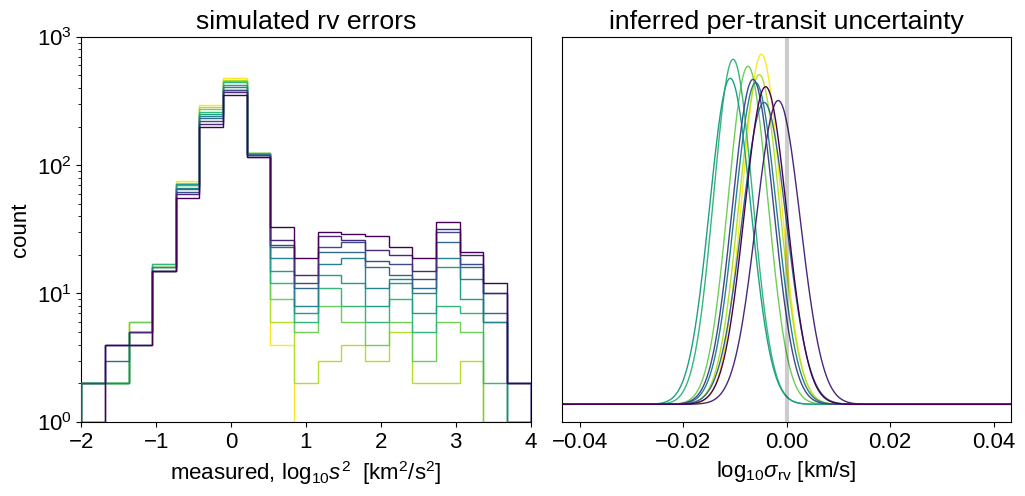

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.07)

ax = axes[0]
x = np.linspace(-2, 4, 500)
bins = np.linspace(-2, 4, 20)
for n, (bf, data) in enumerate(zip(binary_fraction, datasets)):
    ax.hist(
        np.log10(data[1]),
        bins,
        color=mpl.cm.viridis(1 - bf / binary_fraction.max()),
        lw=1,
        histtype="step",
        zorder=n,
    )
ax.set_yscale("log")
ax.set_ylim(1, 1e3)
ax.set_xlim(x.min(), x.max())
ax.set_xlabel(r"measured, $\log_{10} s^2$  [km$^2$/s$^2$]")
ax.set_ylabel("count")
ax.set_title("simulated rv errors")

ax = axes[1]
x = np.log(true_sigma) + np.linspace(-0.1, 0.1, 500)
xp = np.log10(np.exp(x))
for bf, p in zip(binary_fraction, params):
    mean, std = p["mu_log_sigma0"], p["sigma_log_sigma0"]
    ax.plot(
        xp,
        np.exp(-0.5 * ((x - mean) / std) ** 2) / np.sqrt(2 * np.pi * std ** 2),
        lw=1,
        color=mpl.cm.viridis(1 - bf / binary_fraction.max()),
    )
ax.axvline(np.log10(true_sigma), lw=3.0, alpha=0.2, color="k")
ax.set_yticks([])
ax.set_xlabel(r"$\log_{10} \sigma_\mathrm{rv}$ [km/s]")
ax.set_xlim(xp.min(), xp.max())
ax.set_title("inferred per-transit uncertainty")

fig.savefig("sim_rv_uncertainty.pdf", bbox_inches="tight")